In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
match_events= pd.read_csv('/Users/tsovinarbabakhanyan/Desktop/TunisiaLocalChapter_UEFAEURO2024/Datasets/match_events.csv')

In [3]:
match_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6136 entries, 0 to 6135
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   matchid              6136 non-null   int64  
 1   hometeamname         6136 non-null   object 
 2   awayteamname         6136 non-null   object 
 3   event                6136 non-null   object 
 4   minute               6136 non-null   int64  
 5   phase                6136 non-null   int64  
 6   injuryminute         6136 non-null   int64  
 7   teamfromid           5797 non-null   float64
 8   teamtoid             1603 non-null   float64
 9   playerfromid         5791 non-null   float64
 10  playertoid           1592 non-null   float64
 11  time                 6136 non-null   object 
 12  matcheventattribute  93 non-null     object 
dtypes: float64(4), int64(4), object(5)
memory usage: 623.3+ KB


In [4]:
match_events.head()

,matchid,hometeamname,awayteamname,event,minute,phase,injuryminute,teamfromid,teamtoid,playerfromid,playertoid,time,matcheventattribute
0,2024442,Austria,North Macedonia,StartFirstHalf,0,1,0,NaN,NaN,NaN,NaN,2021-06-13T16:00:20.217,NaN
1,2024442,Austria,North Macedonia,Foul,4,1,0,59205.0,8.0,250039878.0,250003976.0,2021-06-13T16:03:45.897,NaN
2,2024442,Austria,North Macedonia,FreeKick,4,1,0,8.0,NaN,1909713.0,NaN,2021-06-13T16:03:56.853,NaN
3,2024442,Austria,North Macedonia,Foul,5,1,0,59205.0,8.0,250004363.0,101177.0,2021-06-13T16:04:44.217,NaN
4,2024442,Austria,North Macedonia,FreeKick,5,1,0,8.0,NaN,250065408.0,NaN,2021-06-13T16:04:54.533,NaN


In [5]:
categorical_col = ['hometeamname','awayteamname','event','time','matcheventattribute']

In [6]:
match_events = match_events.drop(columns=categorical_col)

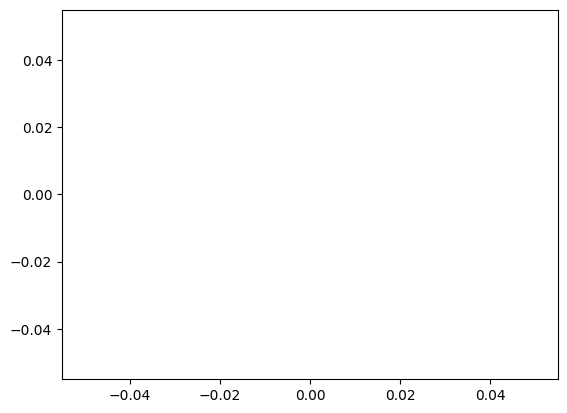

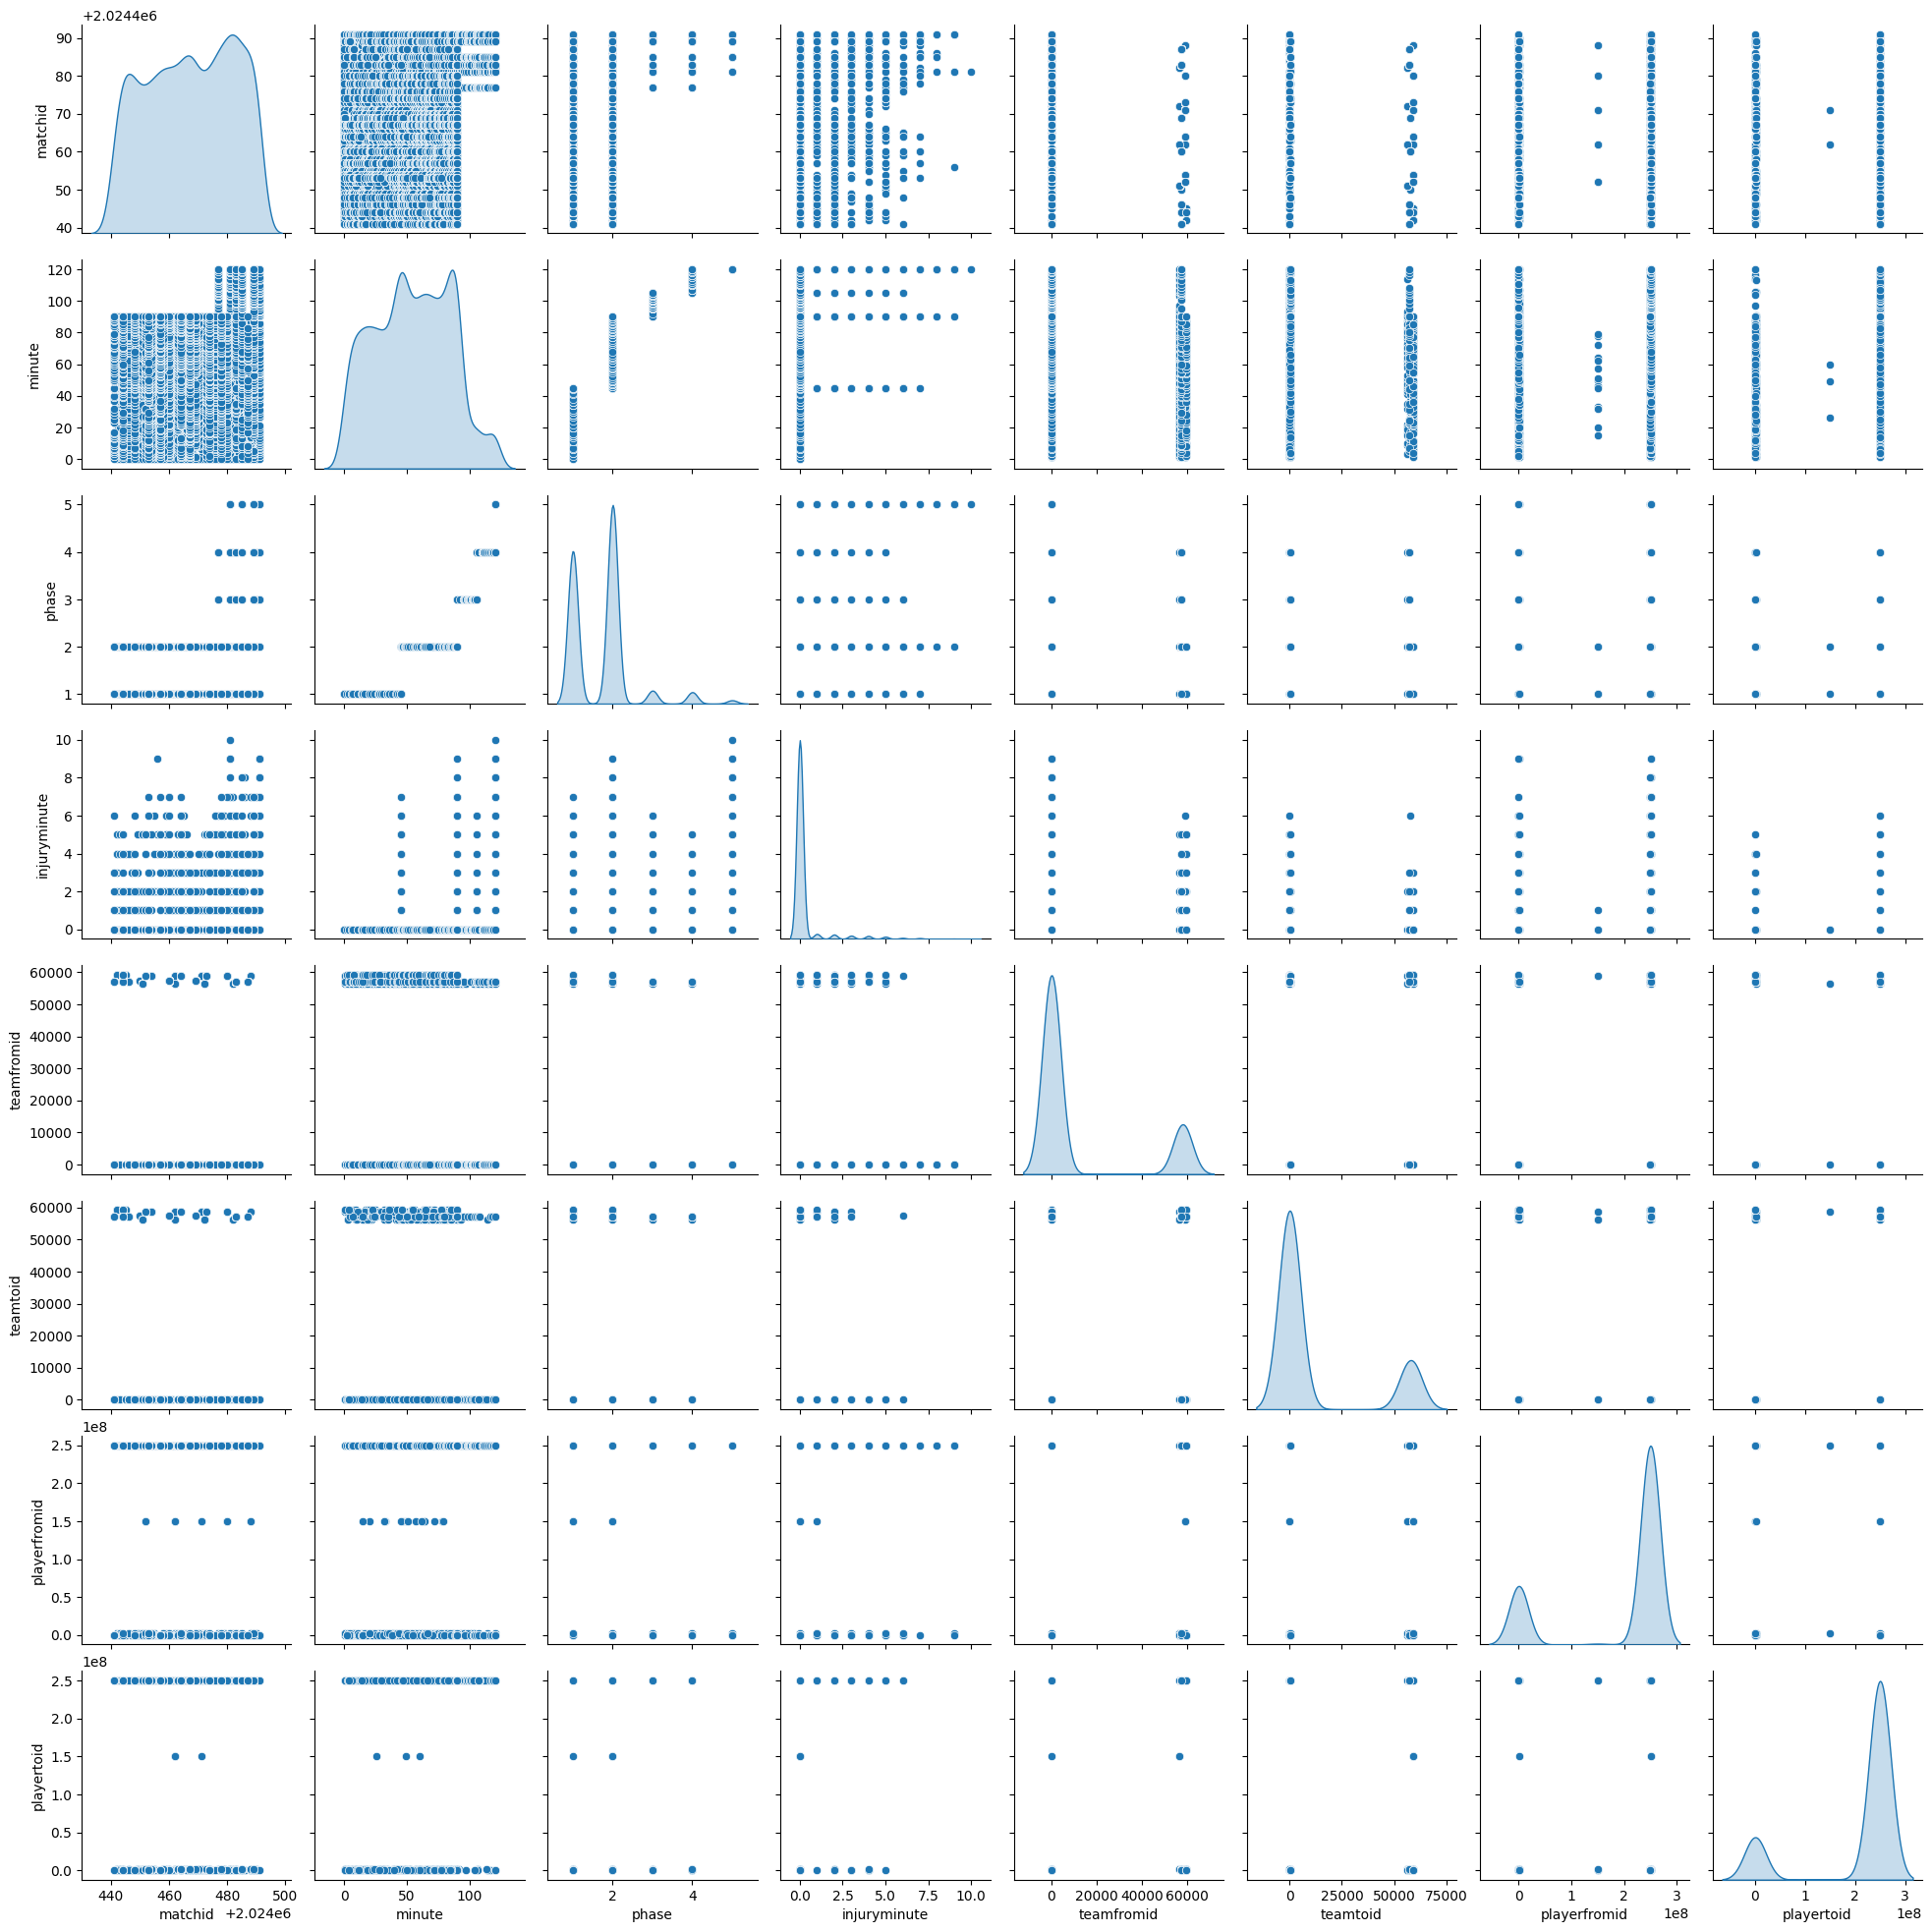

In [7]:
plt.plot(figsize=(16,6))
sns.pairplot(data=match_events,diag_kind='kde')

In [8]:
match_events = match_events.dropna()

In [9]:
X = match_events.drop('injuryminute',axis=1)
Y = match_events['injuryminute']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [49]:
from sklearn.ensemble import RandomForestClassifier
randclass = RandomForestClassifier(n_estimators = 20, random_state = 0)
randclass.fit(X_train,Y_train)
y_pred = randclass.predict(X_test)


In [12]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train,Y_train)

MultinomialNB()

In [13]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=100)
log.fit(X_train,Y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train,Y_train)

LinearSVC()

In [61]:
from sklearn import tree
treeclass = tree.DecisionTreeClassifier()
treeclass = treeclass.fit(X_train, Y_train)

In [62]:
from sklearn.linear_model import LinearRegression
linreg= LinearRegression()
linreg.fit(X_train, Y_train)

LinearRegression()

In [63]:
from sklearn.metrics import classification_report

In [64]:
def report(model):
    preds = model.predict(X_test)
    print(classification_report(Y_test,preds))

NB MODEL
              precision    recall  f1-score   support

           0       0.95      0.12      0.21       454
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         1

    accuracy                           0.12       478
   macro avg       0.14      0.02      0.03       478
weighted avg       0.90      0.12      0.20       478



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

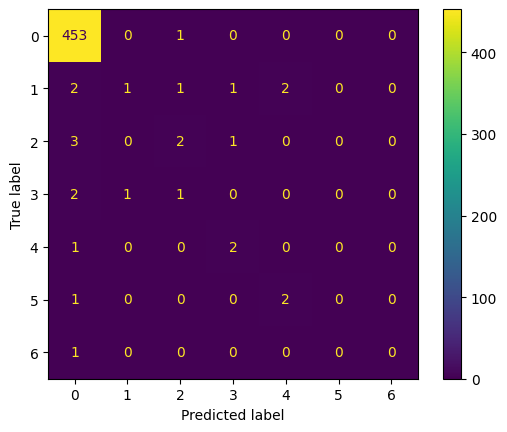

In [65]:
print("NB MODEL")
report(nb)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred)
plt.show()

Logistic Regression
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       454
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         1

    accuracy                           0.95       478
   macro avg       0.14      0.14      0.14       478
weighted avg       0.90      0.95      0.93       478



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

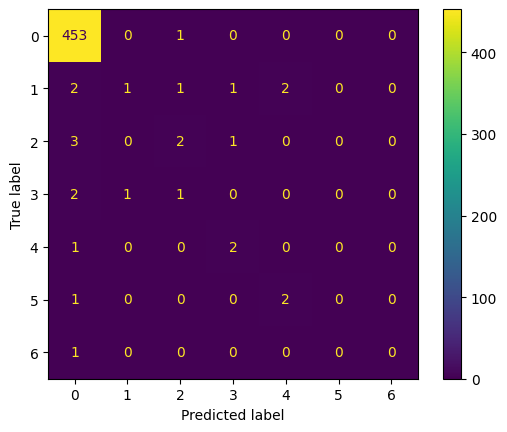

In [66]:
print("Logistic Regression")
report(log)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred)
plt.show()

SVC
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       454
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         1

    accuracy                           0.95       478
   macro avg       0.14      0.14      0.14       478
weighted avg       0.90      0.95      0.93       478



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

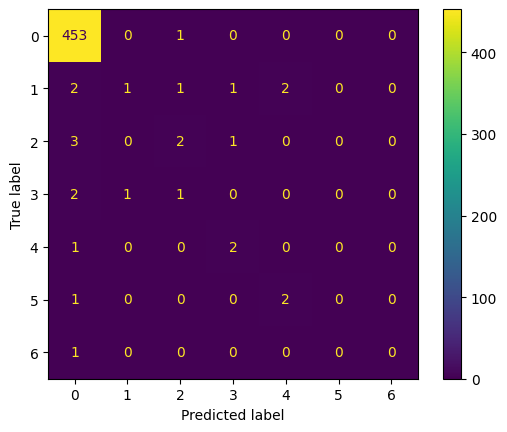

In [67]:
print("SVC")
report(svc)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred)
plt.show()

Random Forest
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       454
           1       0.50      0.14      0.22         7
           2       0.40      0.33      0.36         6
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         1

    accuracy                           0.95       478
   macro avg       0.27      0.21      0.22       478
weighted avg       0.94      0.95      0.95       478



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

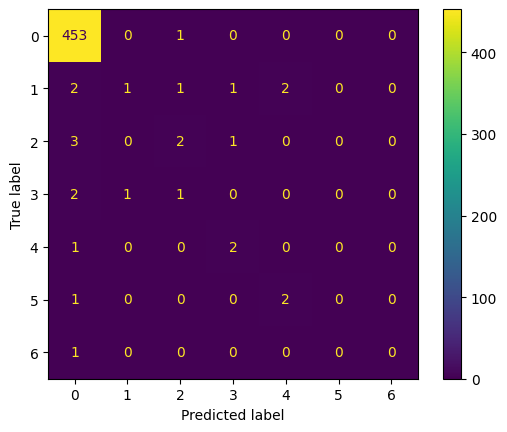

In [68]:
print("Random Forest")
report(randclass)
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred)
plt.show()

Decition tree
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       454
           1       0.00      0.00      0.00         7
           2       0.17      0.17      0.17         6
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         1

    accuracy                           0.94       478
   macro avg       0.16      0.17      0.17       478
weighted avg       0.94      0.94      0.94       478



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

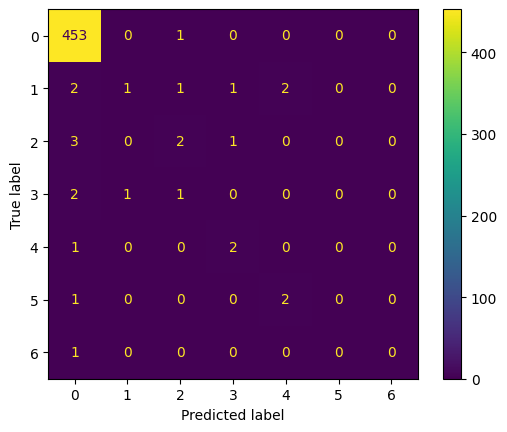

In [69]:
print("Decition tree")
report(treeclass)
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred)
plt.show()

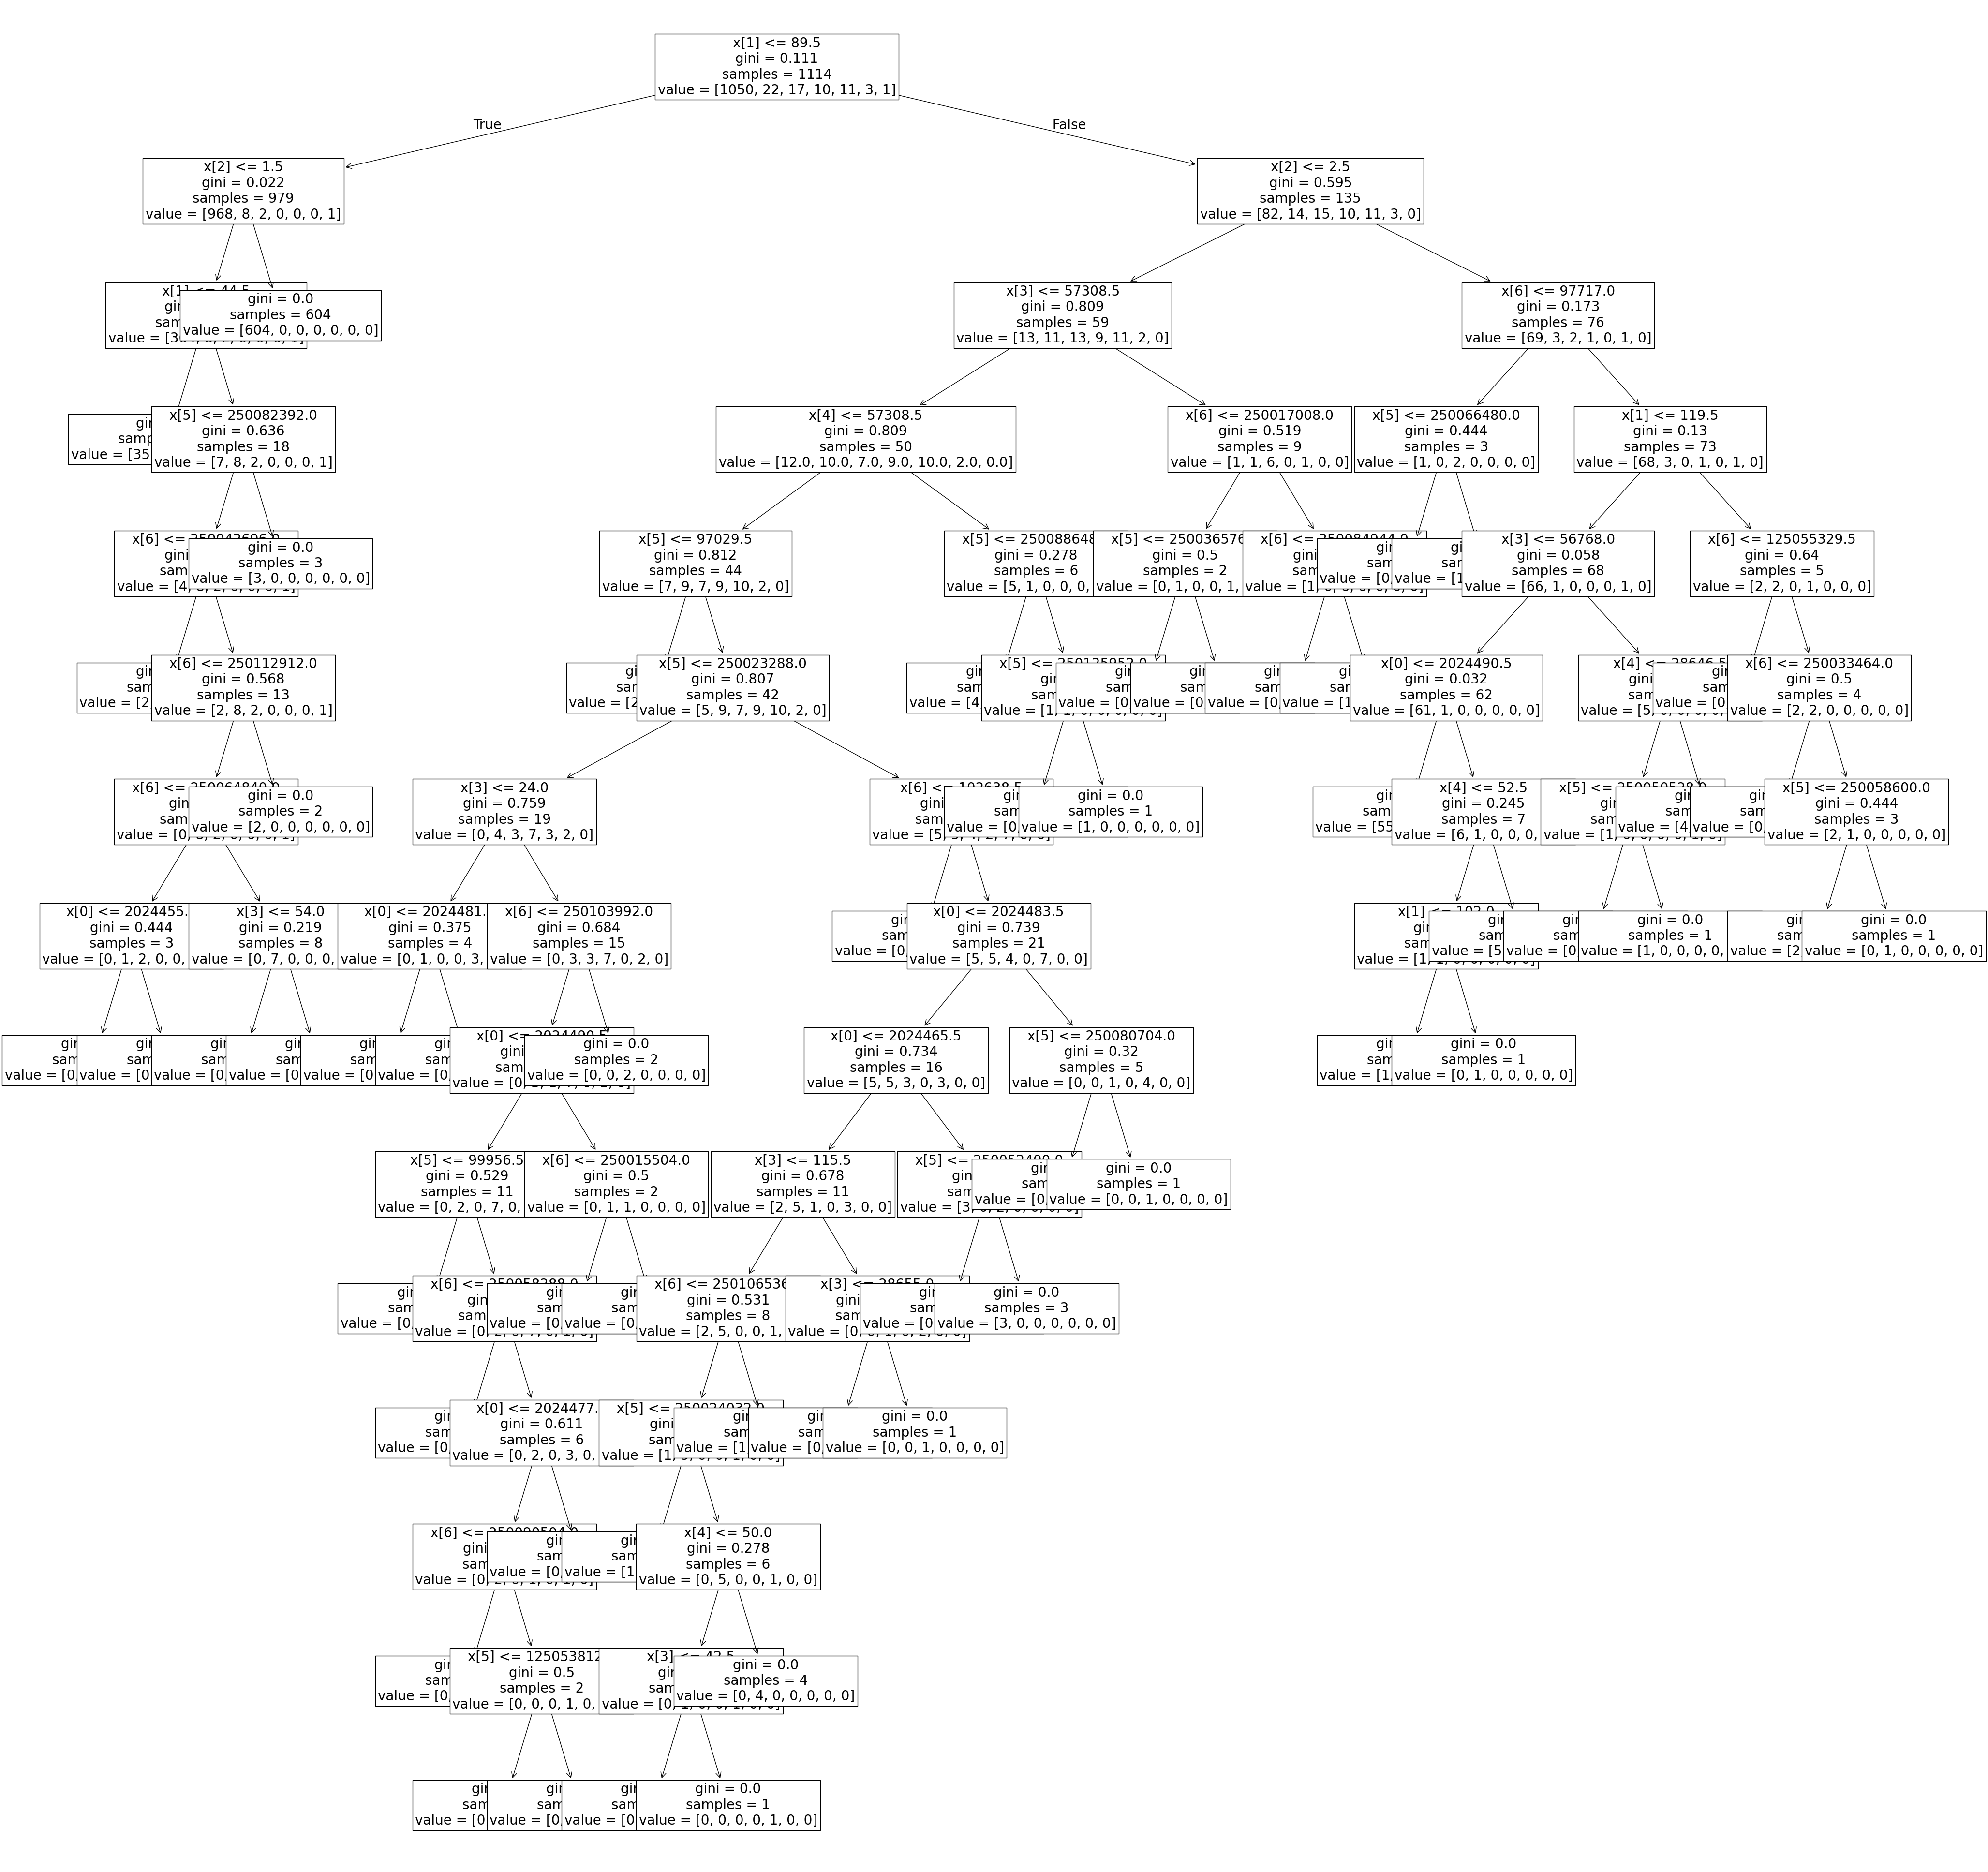

In [77]:
# plot tree
plt.figure(figsize=(50,50))  # set plot size (denoted in inches)
tree.plot_tree(treeclass, fontsize=20)
plt.show()

In [78]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [79]:
reg.score(X_train,Y_train)

0.09560592355575226

In [80]:
reg.coef_

array([ 1.57305584e-03,  1.26867160e-02, -4.04172364e-01,  5.32149094e-07,
       -8.27649183e-07,  1.08260289e-10, -4.42587565e-11])

In [81]:
reg.intercept_

-3184.48433781222

In [82]:
reg_predictions = reg.predict(X_test)

In [83]:
reg_predictions

array([ 0.40169436,  0.39984985,  0.47546113,  0.25903146, -0.02257469,
        0.29735337,  0.23638604, -0.07552148,  0.20733835,  0.28218519,
        0.10783264,  0.36658681, -0.07121676,  0.14108242,  0.03032711,
        0.36296659,  0.24560091, -0.10827815,  0.01560209, -0.03284408,
       -0.0299218 ,  0.36138582, -0.03011666,  0.17905987,  0.17571038,
       -0.06536598,  0.29701867,  0.21629233, -0.14217331,  0.43791896,
        0.1823416 , -0.16829178,  0.03958036,  0.03875123,  0.41085079,
        0.07122904,  0.17904882,  0.24699479,  0.34232207,  0.20639478,
        0.40440348,  0.37760745,  0.14961751, -0.00337531,  0.37584645,
        0.13574137, -0.17048351,  0.17628278,  0.40218633,  0.19099585,
        0.21253657,  0.46618547, -0.24223925,  0.19515293,  0.12179192,
        0.19542911,  0.29164827,  0.36019777, -0.03782004,  0.14066064,
        0.06769517, -0.08210138,  0.34595491,  0.34395563,  0.39501843,
        0.45352604,  0.42037827,  0.12059305,  0.13984485, -0.14

In [84]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [85]:
MAE = mean_absolute_error(Y_test,reg_predictions)
MSE = mean_squared_error(Y_test,reg_predictions)
RMSE = np.sqrt(MSE)

In [86]:
MAE

0.2938508211993354

In [87]:
MSE

0.41531452681399683

In [88]:
RMSE

0.6444490102513906

In [89]:
match_events.corr()

,matchid,minute,phase,injuryminute,teamfromid,teamtoid,playerfromid,playertoid
matchid,1.000000,0.129937,0.186546,0.046549,-0.151619,-0.193345,0.045861,0.085036
minute,0.129937,1.000000,0.853078,0.208231,-0.014231,-0.014803,-0.006003,0.079648
phase,0.186546,0.853078,1.000000,0.065980,-0.024397,-0.020527,0.017667,0.070099
injuryminute,0.046549,0.208231,0.065980,1.000000,-0.000408,-0.037277,0.006175,0.002363
teamfromid,-0.151619,-0.014231,-0.024397,-0.000408,1.000000,0.259638,-0.053734,-0.030398
teamtoid,-0.193345,-0.014803,-0.020527,-0.037277,0.259638,1.000000,-0.029140,-0.011033
playerfromid,0.045861,-0.006003,0.017667,0.006175,-0.053734,-0.029140,1.000000,-0.002425
playertoid,0.085036,0.079648,0.070099,0.002363,-0.030398,-0.011033,-0.002425,1.000000


In [90]:
from sklearn.ensemble import AdaBoostClassifier

In [91]:
adaboost=AdaBoostClassifier(n_estimators=100,random_state=0)
adaboost.fit(X_train,Y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=100, random_state=0)

Ada boost
              precision    recall  f1-score   support

           0       0.96      0.45      0.61       454
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         6
           3       0.20      0.25      0.22         4
           4       0.06      0.33      0.11         3
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         1

    accuracy                           0.43       478
   macro avg       0.17      0.15      0.13       478
weighted avg       0.92      0.43      0.58       478



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

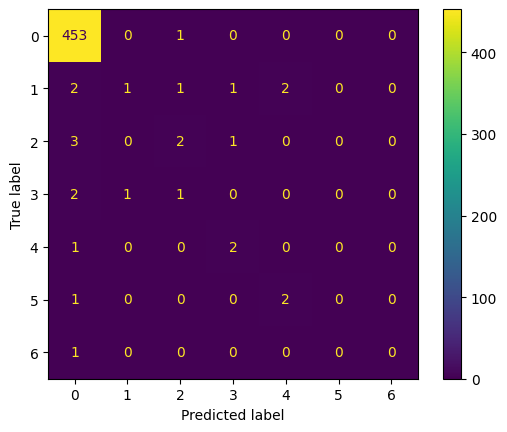

In [92]:
print("Ada boost")
report(adaboost)
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred)
plt.show()

In [93]:
#!pip install xgboost

In [98]:
from sklearn.ensemble import GradientBoostingClassifier
gradboost = GradientBoostingClassifier()
gradboost.fit(X_train,Y_train)

GradientBoostingClassifier()

Gradient  boost
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       454
           1       0.00      0.00      0.00         7
           2       0.25      0.17      0.20         6
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         1

    accuracy                           0.94       478
   macro avg       0.18      0.17      0.17       478
weighted avg       0.93      0.94      0.94       478



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

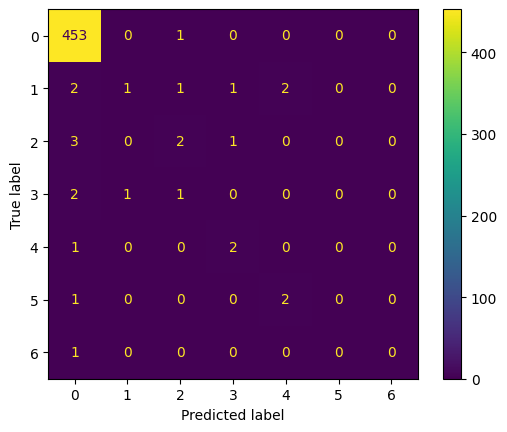

In [99]:
print("Gradient  boost")
report(gradboost)
ConfusionMatrixDisplay.from_predictions(Y_test,y_pred)
plt.show()

The more precision gives from classifier:
Decision tree classifer the precision is 0.99
Accuracy Decision tree is 0.94

Accuracy'c max give logistic regression, random forest classifer and SVC which is 
0.95

Precission for this model's is: 
1. LogRegression : 0.95
2. SVC : 0.95
3. Random Forest: 0.98
